In [452]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

from pydeseq2.utils import build_design_matrix
#from pydeseq2.dds import DeseqDataSet
#from pydeseq2.default_inference import DefaultInference
#from pydeseq2.ds import DeseqStats

In [39]:
# Loading the data from package

In [209]:
# Test simulated data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/datasets/"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts_cnv_v2.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_v2.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv_v2.csv"), index_col=0)
cnv = cnv.T

In [454]:
# Test real data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/TCGA/lung_cancer/LUAD/"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_test_4.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_4.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv_test_4.csv"), index_col=0)
cnv = cnv.T

In [4]:
#design_matrix = build_design_matrix(
    #metadata=metadata,
    #design_factors="condition",
    #expanded=False,
    #intercept=True
#)
#design_matrix = design_matrix.values
#design_matrix.shape

In [4]:
#num_vars = design_matrix.shape[1]
#X = design_matrix

In [456]:
from dds import pydeseq2CN_data
from inference import Inference
from def_inference import DefInference
import utils_pydeseq2CN

In [458]:
inference = DefInference(n_cpus=8)
dds = pydeseq2CN_data(
    counts=counts_df,
    metadata=metadata,
    cnv=cnv,
    design_factors="condition",
    inference=inference
)

In [460]:
dds.fit_size_factors()

Fitting size factors...
... done in 0.05 seconds.



In [462]:
dds.obsm["size_factors"]

array([1.04251654, 0.81715412, 0.88402987, 0.55891685, 0.94156049,
       0.97250762, 0.6895674 , 1.1155361 , 0.83491061, 1.30576697,
       1.76802115, 0.87177968, 0.77386789, 0.81118401, 0.82664964,
       1.68741929, 0.68182057, 1.00866674, 0.91210396, 0.83715564,
       0.87035071, 1.11498814, 1.81826237, 0.99888097, 0.7924932 ,
       0.74798997, 0.84515664, 1.09568012, 1.9167233 , 1.96822678,
       0.93660493, 0.99591013, 0.69318613, 1.10196504, 1.28114634,
       2.58914176, 0.74794178, 0.82762748, 1.15981114, 0.62667771])

In [464]:
dds.fit_genewise_dispersions()

Fitting dispersions...
... done in 1.75 seconds.



In [466]:
dds.fit_dispersion_trend()

Fitting dispersion trend curve...
... done in 0.36 seconds.



In [468]:
#dds.uns["trend_coeffs"]
dds.varm["fitted_dispersions"]

array([0.89299187, 0.2402516 , 0.69920704, ..., 0.24290272, 0.25081776,
       0.2579466 ])

In [470]:
dds.fit_dispersion_prior()
print(
    f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
)

logres_prior=0.8768946409930345, sigma_prior=0.8228537349553383


In [472]:
dds.fit_MAP_dispersions()

Fitting MAP dispersions...
... done in 2.34 seconds.



ValueError: NumPy boolean array indexing assignment cannot assign 17667 input values to the 201 output values where the mask is true

In [474]:
dds.varm["MAP_dispersions"]

array([0.2417616 , 0.37253528, 0.31674327, ..., 0.18775434, 0.12506996,
       0.07760743])

In [476]:
dds.varm["dispersions"]

array([0.2417616 , 0.37253528, 0.31674327, ..., 0.18775434, 0.12506996,
       0.07760743])

In [40]:
#design_matrix = dds.obsm["design_matrix"]
#design_matrix = design_matrix.values

In [16]:
#beta = (6.47867033, 0.06064821)
#beta = np.array(beta)
#beta

In [17]:
#beta.shape[0]
#design_matrix.shape[1]

In [22]:
#if beta.shape[0] != design_matrix.shape[1]:
    #beta = beta.reshape(design_matrix.shape[1], -1)

In [478]:
dds.fit_LFC()

Fitting LFCs...
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:122: RuntimeWarning: overflow encountered in exp
  mu = np.maximum(cnv * size_factors * np.exp(X @ beta), min_mu)
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:323: RuntimeWarning: invalid value encountered in multiply
  - counts * np.log(mu)
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:321: RuntimeWarning: invalid value encountered in subtract
  -logbinom
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:131: RuntimeWarning: invalid value encountered in divide
  W = mu / (1.0 + mu * disp)
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:138: RuntimeWarning: overflow encountered in exp
  mu = cnv * size_factors * np.exp(X @ beta)
... done in 1.86 seconds.


In [480]:
dds.varm["LFC"]

,intercept,condition_B_vs_A
A1BG-AS1,3.687053,-0.650517
A2M,11.720229,-1.813105
A2M-AS1,4.117527,-0.942960
A4GALT,6.628613,-0.248979
AAAS,6.865257,-0.186735
...,...,...
ZXDC,7.097486,-0.627454
ZYG11B,7.494391,-0.649974
ZYX,9.133269,-1.015981
ZZEF1,7.890817,-0.577960


In [39]:
# Check relevant data properties
#print("Counts shape:", counts_df.shape)
#print("CNV shape:", cnv.shape)
#print("non_zero_idx shape:", non_zero_idx.shape)
#print("non_zero_idx content (first 10):", non_zero_idx[:10])

In [40]:
# Check compatibility
#if isinstance(non_zero_idx, (np.ndarray, pd.Series)):
    #if non_zero_idx.max() >= counts_df.shape[1]:
        #print("Error: Index exceeds data dimensions.")
    #else:
        #print("Indexing looks valid.")

In [41]:
#if isinstance(counts_df, pd.DataFrame):
    #print(counts_df.columns)
#if isinstance(cnv, pd.DataFrame):
    #print(cnv.columns)

In [ ]:
# Statistical test

In [482]:
import dds_stat
from dds_stat import pydeseq2CN_Stats

In [484]:
# Statistical analysis
stat_res = pydeseq2CN_Stats(dds, alpha=0.05, independent_filter=True)

In [486]:
stat_res.run_wald_test()

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
Running Wald tests...
/opt/anaconda3/lib/python3.11/site-packages/pydeseq2/utils.py:931: RuntimeWarning: invalid value encountered in divide
  W = np.diag(mu / (1 + mu * disp))
... done in 0.58 seconds.



In [490]:
stat_res.p_values

A1BG-AS1    9.867599e-05
A2M         5.810180e-21
A2M-AS1     4.044485e-07
A4GALT      2.290778e-01
AAAS        1.777749e-02
                ...     
ZXDC        6.438783e-09
ZYG11B      1.955510e-25
ZYX         1.257948e-13
ZZEF1       2.511253e-07
ZZZ3        1.031002e-02
Length: 17667, dtype: float64

In [492]:
if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

/opt/anaconda3/lib/python3.11/site-packages/pydeseq2/utils.py:1588: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(A, b)[0]


A1BG-AS1    2.170872e-04
A2M         8.191751e-20
A2M-AS1     1.247815e-06
A4GALT      2.789610e-01
AAAS        2.698781e-02
                ...     
ZXDC        2.505452e-08
ZYG11B      4.157165e-24
ZYX         8.346838e-13
ZZEF1       7.964776e-07
ZZZ3        1.634100e-02
Name: 0, Length: 17667, dtype: float64

In [494]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A
              baseMean  log2FoldChange     lfcSE       stat        pvalue  \
A1BG-AS1     35.799108       -0.938498  0.241022  -3.893825  9.867599e-05   
A2M       76259.263133       -2.615758  0.278468  -9.393386  5.810180e-21   
A2M-AS1      50.904482       -1.360403  0.268491  -5.066852  4.044485e-07   
A4GALT      855.936644       -0.359201  0.298653  -1.202738  2.290778e-01   
AAAS       1157.859278       -0.269402  0.113661  -2.370220  1.777749e-02   
...                ...             ...       ...        ...           ...   
ZXDC       1175.222861       -0.905225  0.155940  -5.804943  6.438783e-09   
ZYG11B     1703.020468       -0.937714  0.089969 -10.422591  1.955510e-25   
ZYX        7904.313499       -1.465751  0.197793  -7.410531  1.257948e-13   
ZZEF1      2150.196346       -0.833820  0.161691  -5.156860  2.511253e-07   
ZZZ3       1298.691664       -0.328188  0.127936  -2.565254  1.031002e-02   

                  pa

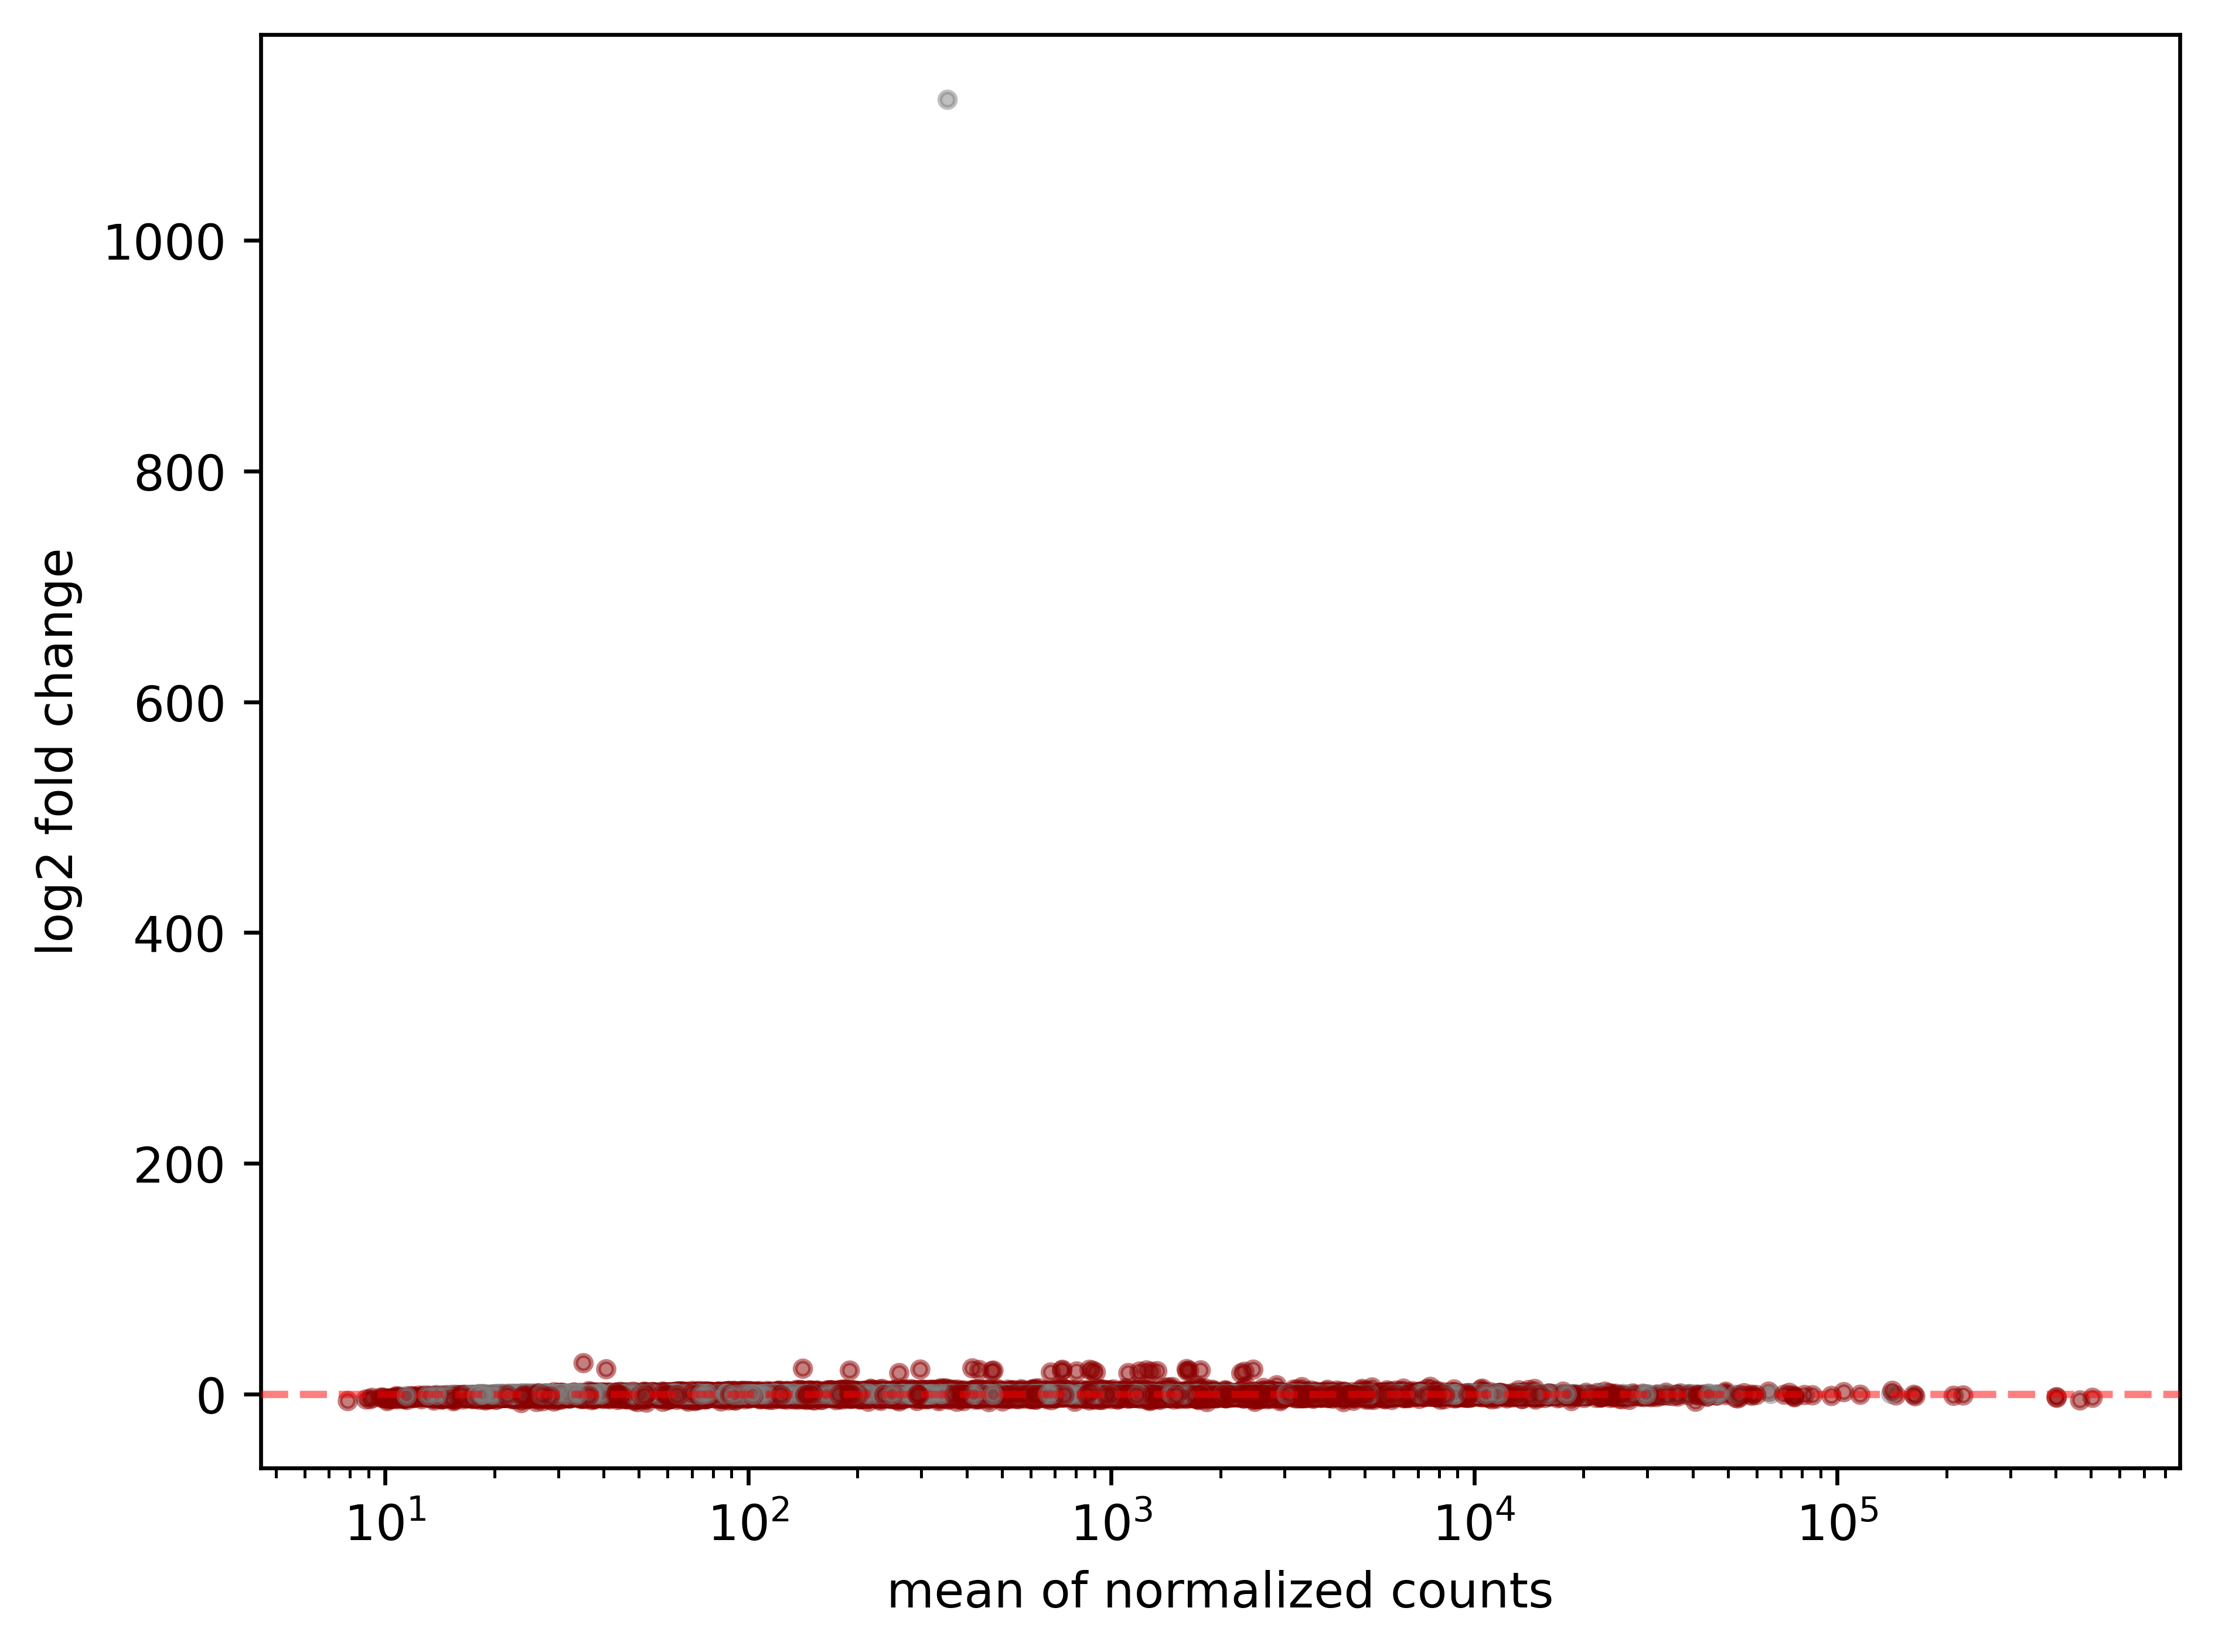

In [496]:
stat_res.plot_MA(s=10)

In [498]:
stat_res.lfc_shrink(coeff="condition_B_vs_A")

/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/dds_stat.py:378: RuntimeWarning: divide by zero encountered in log
  cnv = np.log(cnv)
Fitting MAP LFCs...
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:428: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset - cnv))
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:437: RuntimeWarning: overflow encountered in exp
  exp_xbeta_off = np.exp(xbeta + offset + cnv)
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:438: RuntimeWarning: invalid value encountered in divide
  frac = (counts + size) * size * exp_xbeta_off / (size + exp_xbeta_off) ** 2
/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/pydeseq2_CNaware/utils_pydeseq2CN.py:437: RuntimeWarning: overflow encountered in exp
  

Shrunk log2 fold change & Wald test p-value: condition B vs A
              baseMean  log2FoldChange     lfcSE       stat        pvalue  \
A1BG-AS1     35.799108       -0.902885  0.236850  -3.893825  9.867599e-05   
A2M       76259.263133       -0.564819  0.330447  -9.393386  5.810180e-21   
A2M-AS1      50.904482       -1.311220  0.265663  -5.066852  4.044485e-07   
A4GALT      855.936644       -0.328045  0.293264  -1.202738  2.290778e-01   
AAAS       1157.859278       -0.265767  0.113134  -2.370220  1.777749e-02   
...                ...             ...       ...        ...           ...   
ZXDC       1175.222861       -0.887804  0.155448  -5.804943  6.438783e-09   
ZYG11B     1703.020468       -0.931847  0.089670 -10.422591  1.955510e-25   
ZYX        7904.313499       -1.463508  0.197158  -7.410531  1.257948e-13   
ZZEF1      2150.196346       -0.813889  0.161243  -5.156860  2.511253e-07   
ZZZ3       1298.691664       -0.325002  0.127518  -2.565254  1.031002e-02   

             

... done in 2.28 seconds.



In [500]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A
              baseMean  log2FoldChange     lfcSE       stat        pvalue  \
A1BG-AS1     35.799108       -0.902885  0.236850  -3.893825  9.867599e-05   
A2M       76259.263133       -0.564819  0.330447  -9.393386  5.810180e-21   
A2M-AS1      50.904482       -1.311220  0.265663  -5.066852  4.044485e-07   
A4GALT      855.936644       -0.328045  0.293264  -1.202738  2.290778e-01   
AAAS       1157.859278       -0.265767  0.113134  -2.370220  1.777749e-02   
...                ...             ...       ...        ...           ...   
ZXDC       1175.222861       -0.887804  0.155448  -5.804943  6.438783e-09   
ZYG11B     1703.020468       -0.931847  0.089670 -10.422591  1.955510e-25   
ZYX        7904.313499       -1.463508  0.197158  -7.410531  1.257948e-13   
ZZEF1      2150.196346       -0.813889  0.161243  -5.156860  2.511253e-07   
ZZZ3       1298.691664       -0.325002  0.127518  -2.565254  1.031002e-02   

                  pa

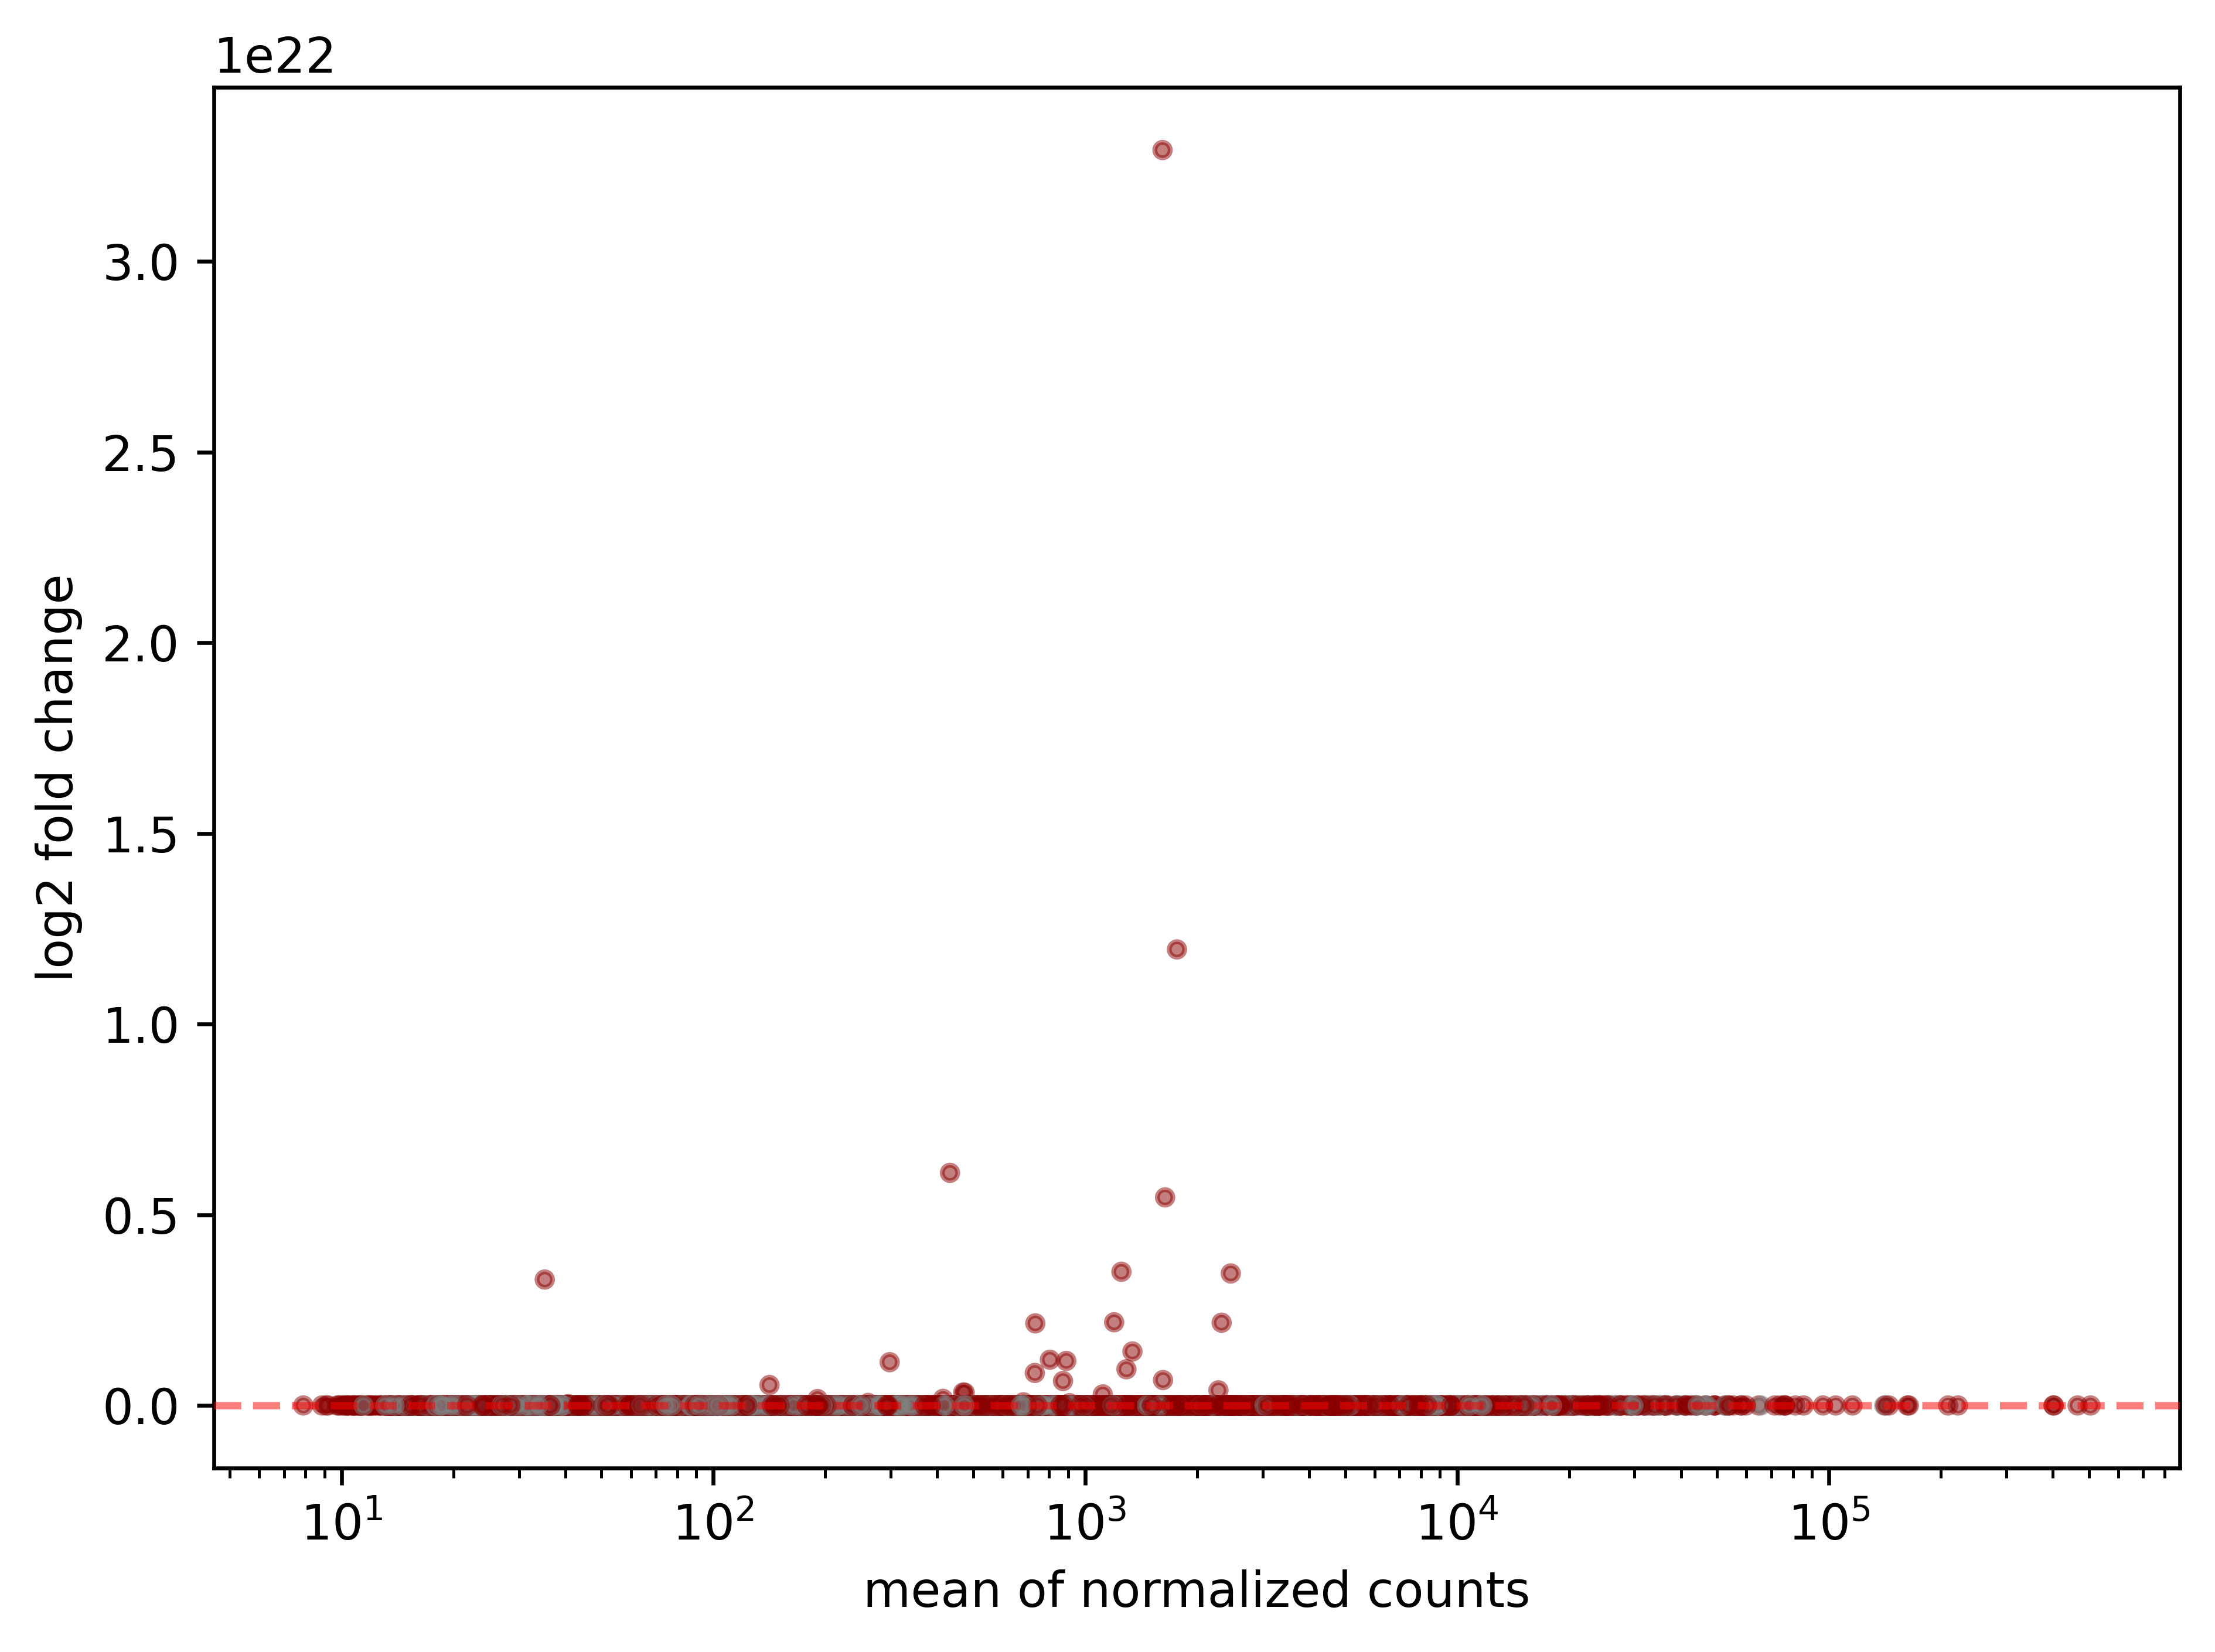

In [502]:
stat_res.plot_MA(s=10)

In [504]:
OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/results"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "res_CNaware_test4.csv"))